In [ ]:
import numpy as np
# Generate environment,'#' is forbidden area,'x' is target area
env = np.array([
    ['*','*','*'],
    ['*','*','#'],
    ['#','*','x']
])

(3, 3)


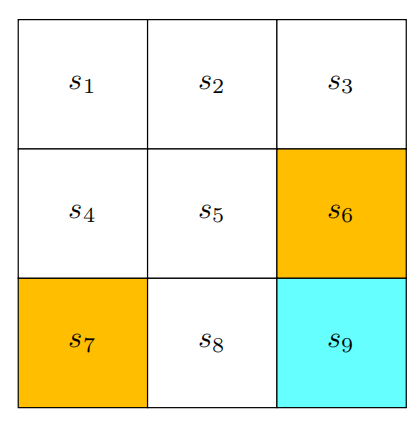

In [ ]:
class ValueIteration:
    def __init__(self, env, _lambda,k,threshold = 1e-3):
        self.env = env
        self._lambda = _lambda # discount rate
        self.k = k # maximum number of iterations
        self.threshold = threshold # threshold for convergence

        self.m,self.n = self.env.shape
        self.action_num = 5
        self.v = np.zeros((self.m,self.n)) # State value
        self.policy = np.zeros((self.m,self.n),dtype=int) # optimal policy

    def next_state(self,x,y,a):
        """return the next state index"""
        xx, yy = [-1, 0, 1, 0, 0], [0, 1, 0, -1, 0] # action space（up, right, down, left, stay）
        isBoundary = 0
        x_next = x + xx[a]
        y_next = y + yy[a]
        if x_next < 0 or x_next >= self.m or y_next < 0 or y_next >= self.n: 
            x_next, y_next = x, y # boundary
        if (x_next,y_next) == (x,y) and a != 4:
            isBoundary = 1
        return x_next, y_next, isBoundary

    def value_iteration(self):
        """value iteration"""
        while True:
            delta = 0 # ||Vk - Vk-1||
            v_old = self.v.copy()
            # calculate the action value of all State
            qk = np.zeros((self.m,self.n,self.action_num)) # action value
            for x in range(self.m):
                for y in range(self.n):
                    for a in range(self.action_num):
                        x_next, y_next ,isBoundary = self.next_state(x,y,a)
                        reward = 0
                        # target area
                        if env[x_next,y_next] == "x" and isBoundary == 0:
                            reward = 1
                         # forbiden area or boundary
                        elif env[x_next,y_next] == "#" or isBoundary == 1 :
                            reward = -10
                        qk[x,y,a] = reward + self._lambda * self.v[x_next,y_next]
                    # optimal policy
                    self.policy[x,y] = np.argmax(qk[x,y])
            # update state value
            for x in range(self.m):
                for y in range(self.n):
                    self.v[x,y] = np.max(qk[x,y])
            print("------------------------")
            self.show_policy()
            # convergence check
            self.k -= 1
            delta = np.linalg.norm(self.v - v_old)
            if delta < self.threshold or self.k == 0:
                break

    def show_policy(self):
        """show the optimal policy"""
        s = "↑→↓←O" # action display
        for x in range(self.m):
            for y in range(self.n):
                print(s[self.policy[x,y]], end=" ")
            print("\n")
        print(self.v)
        
if __name__ == "__main__":
    vi = ValueIteration(env,_lambda=0.9,k=5)
    vi.value_iteration()
    # vi.show_policy()
         
            

-------k = 5-----------
→ → ← 

↑ ↑ ↓ 

↑ → O 

[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 1.]]
-------k = 4-----------
→ → ← 

↑ ↓ ↓ 

→ → O 

[[0.  0.  0. ]
 [0.  0.9 1.9]
 [0.9 1.9 1.9]]
-------k = 3-----------
→ ↓ ← 

→ ↓ ↓ 

→ → O 

[[0.   0.81 0.  ]
 [0.81 1.71 2.71]
 [1.71 2.71 2.71]]
-------k = 2-----------
→ ↓ ← 

→ ↓ ↓ 

→ → O 

[[0.729 1.539 0.729]
 [1.539 2.439 3.439]
 [2.439 3.439 3.439]]
-------k = 1-----------
→ ↓ ← 

→ ↓ ↓ 

→ → O 

[[1.3851 2.1951 1.3851]
 [2.1951 3.0951 4.0951]
 [3.0951 4.0951 4.0951]]
